<a href="https://colab.research.google.com/github/zenialexandre/image-processing/blob/main/partial_assessment_4_1_hough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
'''
  Alexandre Zeni, Bruno Gabriel de Sousa & Leonardo Oliani Fernandes

  Getting the Iris from images with Hough
'''

%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import os
import cv2

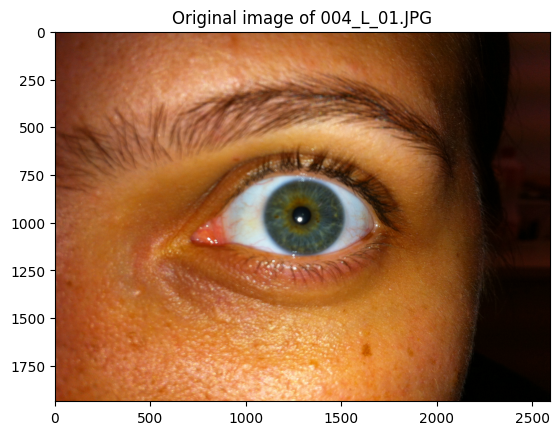

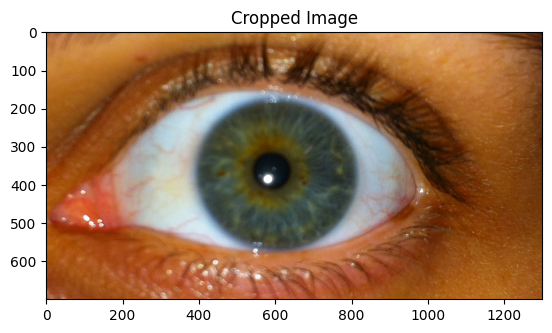

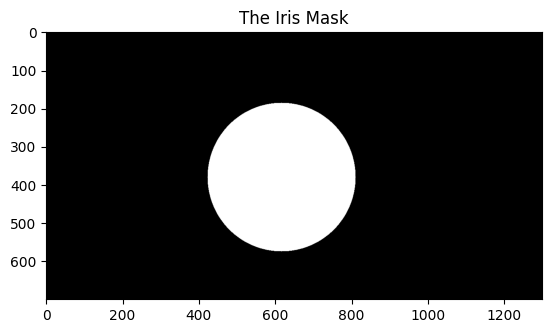

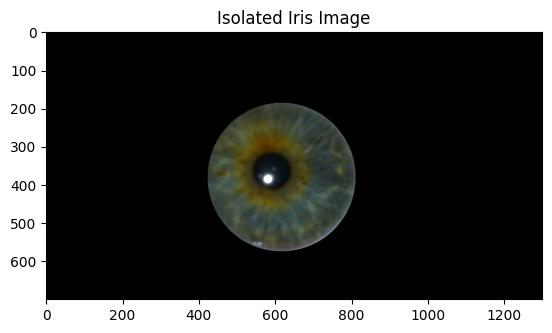

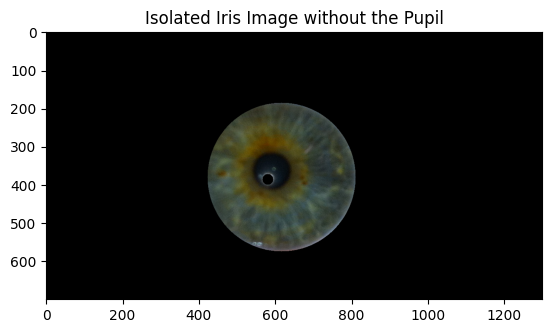

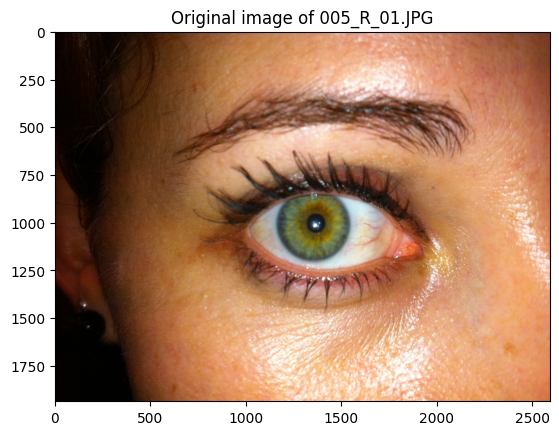

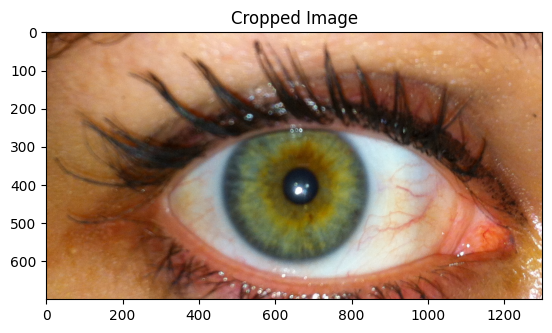

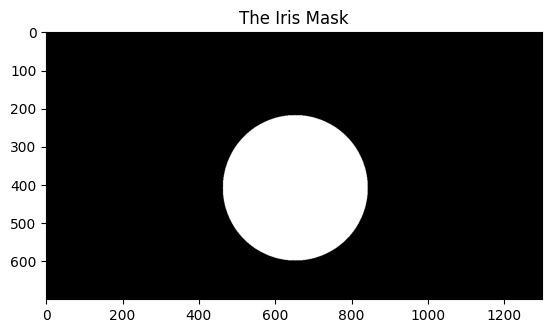

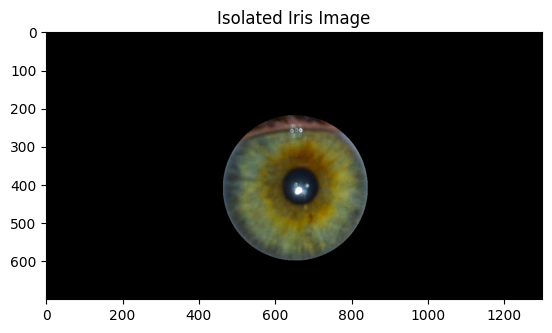

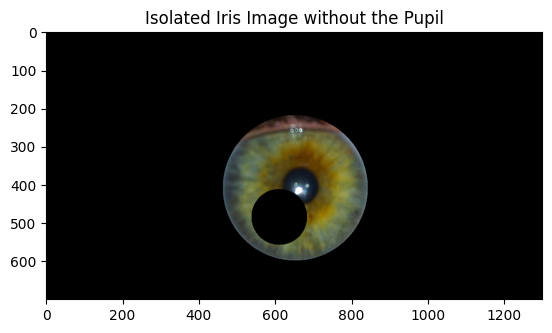

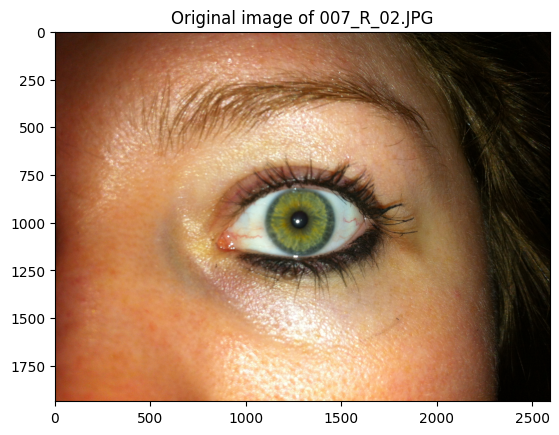

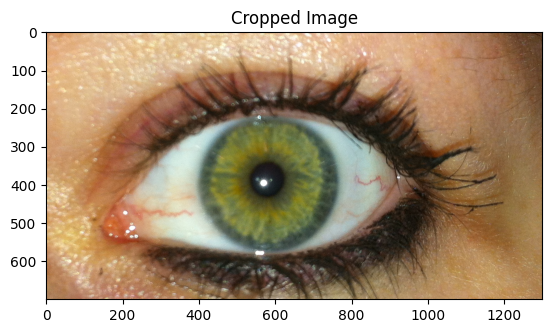

KeyboardInterrupt: 

In [101]:
# Iris Images Processing

content_path: str = r'/content'

def show_image(
  generic_image: np.ndarray,
  title: str
) -> None:
  print('\n')
  plt.imshow(generic_image, cmap='gray')
  plt.title(title)
  plt.show()

def apply_iris_isolation(
  cropped_image: np.ndarray
) -> None:
  circles: np.ndarray = apply_hough_algorithm(cropped_image, 100, 200)

  if circles is not None:
    iris_circle: np.ndarray = circles[0,:][0]
    pupil_circle: np.ndarray = None

    mask: np.ndarray = np.zeros_like(cropped_image, dtype=np.uint8)
    cv2.circle(mask, (iris_circle[0], iris_circle[1]), iris_circle[2], (255, 255, 255), thickness=-1)

    show_image(mask, 'The Iris Mask')

    isolated_iris_image = cv2.bitwise_and(cropped_image, mask)
    show_image(isolated_iris_image, 'Isolated Iris Image')

    circles = apply_hough_algorithm(isolated_iris_image, 10, 85)
    pupil_circle = min(circles[0,:], key=lambda x: x[2])

    cv2.circle(isolated_iris_image, (pupil_circle[0], pupil_circle[1]), pupil_circle[2], (0, 0, 0), thickness=-1)
    show_image(isolated_iris_image, 'Isolated Iris Image without the Pupil')

def apply_hough_algorithm(
  generic_image: np.ndarray,
  minRadius: int,
  maxRadius: int
) -> np.ndarray:
  gray_scaled_image: np.ndarray = cv2.cvtColor(generic_image, cv2.COLOR_BGR2GRAY)
  _, thresholded_image = cv2.threshold(
    gray_scaled_image,
    100,
    255,
    cv2.THRESH_BINARY
  )

  circles: np.ndarray = cv2.HoughCircles(
      thresholded_image,
      cv2.HOUGH_GRADIENT,
      dp=2,
      minDist=150,
      param1=20,
      param2=20,
      minRadius=minRadius,
      maxRadius=maxRadius
  )
  circles = np.uint16(np.around(circles))

  return circles

if (os.path.exists(content_path)):
  walker = os.walk(content_path)

  for (_, _, file_names) in walker:
    for file_name in file_names:
      if ('JPG' in file_name.upper()):
        readed_iris_image: np.ndarray = cv2.imread(file_name)
        readed_iris_image = cv2.cvtColor(readed_iris_image, cv2.COLOR_BGR2RGB)
        show_image(readed_iris_image, f'Original image of {file_name}')

        cropped_image: np.ndarray = readed_iris_image[600:1300, 700:2000]
        show_image(cropped_image, 'Cropped Image')

        apply_iris_isolation(cropped_image)
